# Explore here

In [56]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

import utils as Funcion


total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [57]:
total_data.shape

(20640, 9)

In [58]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [59]:
total_data.duplicated().sum()
total_data = total_data.drop_duplicates()
total_data.shape

(20640, 9)

In [60]:
total_data.drop(["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"], axis = 1, inplace = True)
total_data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [61]:
from sklearn.model_selection import train_test_split

# Asumimos que MedInc es la variable objetivo
X = total_data.drop('MedInc', axis=1)
y = total_data['MedInc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (16512, 2)
Forma de X_test: (4128, 2)
Forma de y_train: (16512,)
Forma de y_test: (4128,)


In [62]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generar datos sintéticos usando make_blobs
# Puedes ajustar n_samples, centers, cluster_std y random_state según necesites
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Convertir los datos a DataFrame para facilitar la visualización y manejo
X_blobs_df = pd.DataFrame(X_blobs, columns=['Feature1', 'Feature2'])

print("Forma de los datos generados:", X_blobs_df.shape)
display(X_blobs_df.head())

Forma de los datos generados: (300, 2)


,Feature1,Feature2
0,-9.297689,6.473679
1,-9.698741,6.938967
2,-1.686653,7.793442
3,-7.097308,-5.781333
4,-10.876452,6.315437


aplicaremos el método del codo a los datos generados con make_blobs para encontrar el número óptimo de clústeres.

In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


X_clustering = total_data[['MedInc', 'Latitude', 'Longitude']]

scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)

numero_de_clusters = 6
kmeans_model = KMeans(n_clusters=numero_de_clusters, random_state=42, n_init=10)
clusters = kmeans_model.fit_predict(X_clustering_scaled)


total_data['cluster'] = clusters

# Mostrar las primeras filas del dataset con la nueva columna de clúster
print("Dataset con la nueva columna 'cluster':")
display(total_data.head())

# Mostrar la cantidad de puntos en cada clúster
print("\nCantidad de puntos en cada clúster:")
print(total_data['cluster'].value_counts())


Dataset con la nueva columna 'cluster':


,MedInc,Latitude,Longitude,cluster
0,8.3252,37.88,-122.23,1
1,8.3014,37.86,-122.22,1
2,7.2574,37.85,-122.24,1
3,5.6431,37.85,-122.25,1
4,3.8462,37.85,-122.25,4



Cantidad de puntos en cada clúster:
cluster
5    6511
4    4839
0    4252
1    2801
2    1658
3     579
Name: count, dtype: int64


Visualizar los clústeres en un diagrama de puntos

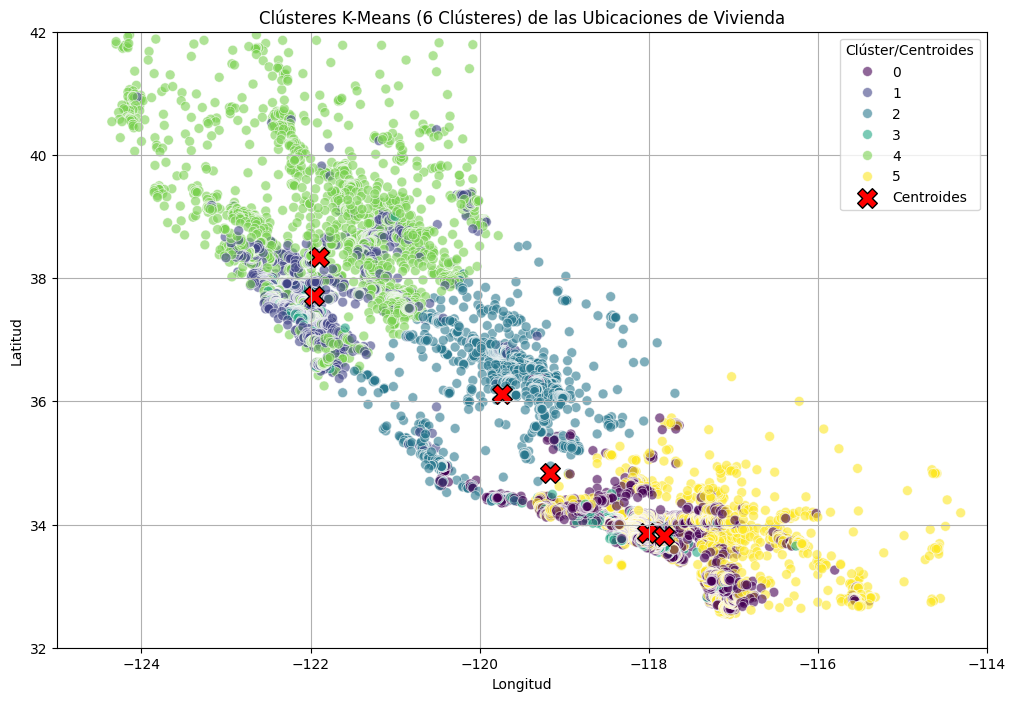

In [64]:

plt.figure(figsize=(12, 8))
sns.scatterplot(data=total_data, x='Longitude', y='Latitude', hue='cluster', palette='viridis', s=50, alpha=0.6)

# Opcional: Añadir los centroides al gráfico
# Los centroides están en la escala de los datos escalados, necesitamos invertirlos
centroides_scaled_clustering = kmeans_model.cluster_centers_
centroides_original_clustering = scaler_clustering.inverse_transform(centroides_scaled_clustering)

plt.scatter(centroides_original_clustering[:, 2], centroides_original_clustering[:, 1], marker='X', s=200, c='red', edgecolors='black', label='Centroides')


plt.title(f'Clústeres K-Means ({numero_de_clusters} Clústeres) de las Ubicaciones de Vivienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Clúster/Centroides')
plt.grid(True)

# Ajustar los límites de los ejes para enfocar la visualización
plt.xlim(-125, -114)
plt.ylim(32, 42)

plt.show()

En esta gráfica de dispersion podemos observar que cada punto representa una vivienda, coloreada según el clúster al que fue asignada por el algoritmo K-Means. Las "X" rojas marcan la ubicación de los centroides de cada clúster.

Lo que observamos es cómo el algoritmo ha agrupado las viviendas basándose en su Latitud, Longitud y Mediana de Ingresos (ya que incluimos "MedInc" en los datos de clustering). Podemos ver que los clústeres tienden a agruparse geográficamente, aunque la influencia de 'MedInc' también juega un papel

In [65]:
from sklearn.model_selection import train_test_split

# Preparamos los datos para el modelo KNN
# X serán las características originales
X_knn = total_data[['MedInc', 'Latitude', 'Longitude']]
# y serán las etiquetas de clúster generadas por K-Means
y_knn = total_data['cluster']

# Dividimos los datos en conjuntos de entrenamiento y prueba
# Usamos un 20% para prueba, que es una división común
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

print("Forma de X_train_knn:", X_train_knn.shape)
print("Forma de X_test_knn:", X_test_knn.shape)
print("Forma de y_train_knn:", y_train_knn.shape)
print("Forma de y_test_knn:", y_test_knn.shape)

Forma de X_train_knn: (16512, 3)
Forma de X_test_knn: (4128, 3)
Forma de y_train_knn: (16512,)
Forma de y_test_knn: (4128,)


In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializamos el modelo KNN con k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento del modelo con los datos de entrenamiento
knn_model.fit(X_train_knn, y_train_knn)

print("Modelo KNN entrenado exitosamente.")

Modelo KNN entrenado exitosamente.


In [67]:
y_pred_knn = knn_model.predict(X_test_knn)

print("Predicciones del modelo KNN en el conjunto de prueba (primeros 5):")
print(y_pred_knn[:5])
print("\nEtiquetas reales del conjunto de prueba (primeros 5):")
print(y_test_knn.head())

Predicciones del modelo KNN en el conjunto de prueba (primeros 5):
[2 2 4 0 4]

Etiquetas reales del conjunto de prueba (primeros 5):
20046    2
3024     2
15663    4
20484    0
9814     4
Name: cluster, dtype: int32


In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Realizamos predicciones en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test_knn)

# Evaluamos el modelo
accuracy = accuracy_score(y_test_knn, y_pred_knn)
report = classification_report(y_test_knn, y_pred_knn)
conf_matrix = confusion_matrix(y_test_knn, y_pred_knn)

print(f"Precisión del modelo KNN: {accuracy:.4f}")
print("\nInforme de Clasificación:")
print(report)

Precisión del modelo KNN: 0.9910

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       837
           1       0.99      0.99      0.99       524
           2       0.99      0.98      0.99       337
           3       1.00      0.98      0.99       114
           4       0.99      1.00      0.99       950
           5       0.99      0.99      0.99      1366

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



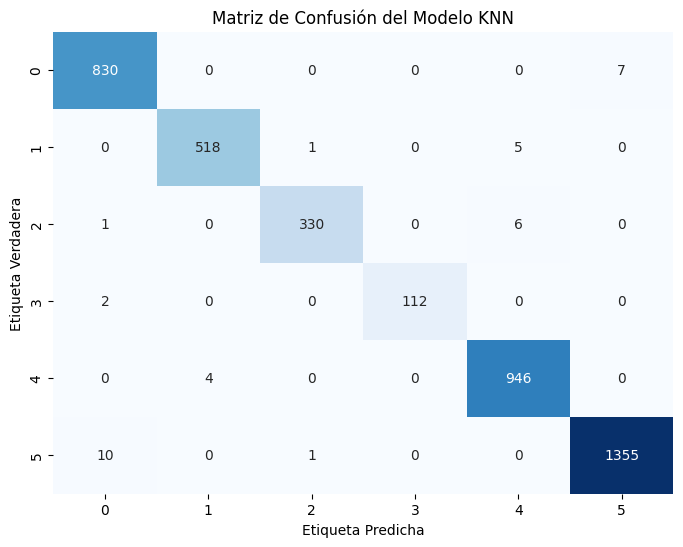

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión del Modelo KNN')
plt.show()

Se aplicó K-Means para agrupar las viviendas en 6 clústeres usando ingreso medio, latitud y longitud. El análisis reveló segmentaciones geográficas y de ingresos. Posteriormente, se entrenó un modelo KNN con estas etiquetas de clúster. El modelo KNN demostró una alta precisión del 99.10% en la predicción de los clústeres en datos no vistos. Esto valida que las características originales son fuertemente predictivas de las agrupaciones encontradas. Los resultados sugieren que los clústeres son distintivos y separables, proporcionando una base sólida para entender la segmentación del mercado inmobiliario.